# Practica V

<div align="justify">Apliquemos lo aprendido gasta el momento utilizando el discurso de Steve Jobs en la Universidad de Stanford.<div>

<strong>Paso 1: Recolección de Datos</strong>

In [1]:
with open('Discurso de Steve Jobs.txt', 'r', encoding='utf-8') as file:
    speech = file.read()

print(speech)

Discurso de Steve Jobs en Stanford.

Me siento honrado de estar con vosotros hoy en esta ceremonia de graduación en una de las mejores universidades del mundo. Yo nunca llegué a licenciarme. De hecho, esto es lo más cerca que he estado
nunca de una graduación universitaria.
Hoy quiero contaros tres historias de mi vida. No es gran cosa. Solo tres historias.
La primera historia es sobre conectar puntos. Me retiré del Reed College a los seis meses de iniciar los estudios, pero seguí asistiendo de modo intermitente a clases durante otros dieciocho meses más antes de abandonar. ¿Por qué lo dejé? Todo empezó antes de nacer. Mi madre biológica era una joven estudiante de universidad, soltera, que decidió darme en adopción. Ella creía firmemente que debía ser adoptado por estudiantes graduados. Por lo tanto, todo estaba dispuesto para que al nacer me adoptaran un abogado y su esposa. Sin embargo, cuando nací se dieron cuenta en el último minuto de que en realidad deseaban una niña. De ese mod

<div align="justify"><strong>Paso 2: Limpieza de Datos</strong>: Limpieza del texto eliminando caracteres no deseados, convirtiendo a minúsculas, etc.<div>

In [2]:
import re

def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres no deseados
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)
    # Eliminar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_speech = clean_text(speech)
print(cleaned_speech)


discurso de steve jobs en stanford me siento honrado de estar con vosotros hoy en esta ceremonia de graduación en una de las mejores universidades del mundo yo nunca llegué a licenciarme de hecho esto es lo más cerca que he estado nunca de una graduación universitaria hoy quiero contaros tres historias de mi vida no es gran cosa solo tres historias la primera historia es sobre conectar puntos me retiré del reed college a los seis meses de iniciar los estudios pero seguí asistiendo de modo intermitente a clases durante otros dieciocho meses más antes de abandonar por qué lo dejé todo empezó antes de nacer mi madre biológica era una joven estudiante de universidad soltera que decidió darme en adopción ella creía firmemente que debía ser adoptado por estudiantes graduados por lo tanto todo estaba dispuesto para que al nacer me adoptaran un abogado y su esposa sin embargo cuando nací se dieron cuenta en el último minuto de que en realidad deseaban una niña de ese modo mis padres que estaba

<div align="justify"><strong>Paso 3: Exploración y Visualización de Datos</strong>: Generar una nube de palabras para visualizar las palabras más frecuentes.<div>

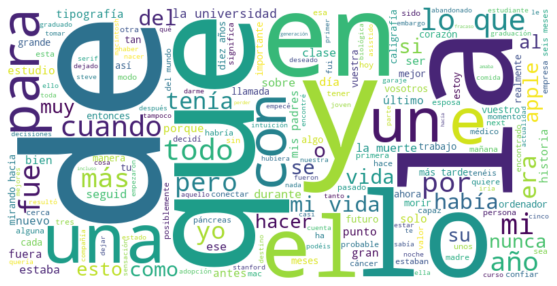

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_speech)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div align="justify"><strong>Paso 4: Preprocesamiento de Datos</strong>: Tokenización, eliminación de stopwords y lematización.<div>

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    # Tokenización
    words = word_tokenize(text)
    # Eliminación de stopwords
    words = [word for word in words if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

preprocessed_speech = preprocess_text(cleaned_speech)
print(preprocessed_speech)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claudiorojas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claudiorojas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/claudiorojas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['discurso', 'steve', 'job', 'stanford', 'siento', 'honrado', 'hoy', 'ceremonia', 'graduación', 'mejores', 'universidades', 'mundo', 'nunca', 'llegué', 'licenciarme', 'hecho', 'cerca', 'nunca', 'graduación', 'universitaria', 'hoy', 'quiero', 'contaros', 'tres', 'historias', 'vida', 'gran', 'cosa', 'solo', 'tres', 'historias', 'primera', 'historia', 'conectar', 'puntos', 'retiré', 'reed', 'college', 'seis', 'me', 'iniciar', 'estudios', 'seguí', 'asistiendo', 'modo', 'intermitente', 'clases', 'dieciocho', 'me', 'abandonar', 'dejé', 'empezó', 'nacer', 'madre', 'biológica', 'joven', 'estudiante', 'universidad', 'soltera', 'decidió', 'darme', 'adopción', 'creía', 'firmemente', 'debía', 'ser', 'adoptado', 'estudiantes', 'graduados', 'dispuesto', 'nacer', 'adoptaran', 'abogado', 'esposa', 'embargo', 'nací', 'dieron', 'cuenta', 'último', 'minuto', 'realidad', 'deseaban', 'niña', 'modo', 'padre', 'lista', 'espera', 'recibieron', 'llamada', 'mitad', 'noche', 'preguntándoles', 'niño', 'deseado', 

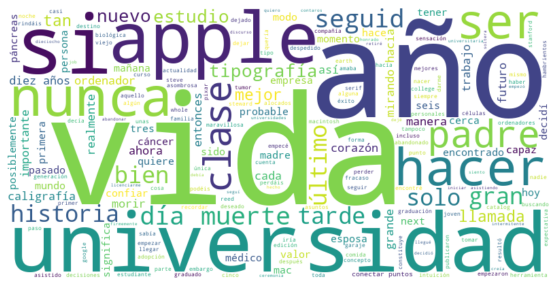

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir las palabras preprocesadas en un solo texto
processed_text = ' '.join(preprocessed_speech)

# Generar la nueva nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Visualizar la nueva nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div align="justify"><strong>Paso 5: Vectotización de Datos</strong>: Representación del texto usando TF-IDF.<div>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar el discurso
tfidf_matrix = vectorizer.fit_transform([cleaned_speech])
print(tfidf_matrix)


  (0, 364)	0.004826358252922993
  (0, 216)	0.004826358252922993
  (0, 368)	0.004826358252922993
  (0, 320)	0.004826358252922993
  (0, 516)	0.004826358252922993
  (0, 218)	0.004826358252922993
  (0, 489)	0.004826358252922993
  (0, 33)	0.009652716505845985
  (0, 388)	0.009652716505845985
  (0, 345)	0.004826358252922993
  (0, 593)	0.004826358252922993
  (0, 68)	0.004826358252922993
  (0, 600)	0.004826358252922993
  (0, 70)	0.004826358252922993
  (0, 51)	0.004826358252922993
  (0, 708)	0.004826358252922993
  (0, 404)	0.004826358252922993
  (0, 669)	0.004826358252922993
  (0, 102)	0.004826358252922993
  (0, 346)	0.004826358252922993
  (0, 541)	0.004826358252922993
  (0, 150)	0.004826358252922993
  (0, 259)	0.004826358252922993
  (0, 482)	0.004826358252922993
  (0, 821)	0.004826358252922993
  :	:
  (0, 463)	0.004826358252922993
  (0, 540)	0.03378450777046095
  (0, 817)	0.05308994078215292
  (0, 509)	0.014479074758768978
  (0, 203)	0.05791629903507591
  (0, 781)	0.004826358252922993
  (0, 487